## 短面板

In [1]:
use "/Users/mac/Stata/计量与stata实例讲解数据/chap16/习题16.1.dta", clear

In [2]:
list year profit sale diqu in 1/10


     +------------------------------------+
     | year     profit       sale    diqu |
     |------------------------------------|
  1. | 2008   10.34432    224.373    湖北 |
  2. | 2009   10.17884   224.7235    湖北 |
  3. | 2010   10.32286   224.7289    湖北 |
  4. | 2011   10.13896   224.5877    湖北 |
  5. | 2012   10.16969   224.4761    湖北 |
     |------------------------------------|
  6. | 2008   9.914922     231.01    河南 |
  7. | 2009   10.15891   231.6112    河南 |
  8. | 2010   10.15774   231.4499    河南 |
  9. | 2011   10.01055    231.233    河南 |
 10. | 2012   10.28739   231.7159    河南 |
     +------------------------------------+


In [3]:
encode diqu, generate(region)

In [4]:
xtset region year

       panel variable:  region (strongly balanced)
        time variable:  year, 2008 to 2012
                delta:  1 unit


In [5]:
xtsum


Variable         |      Mean   Std. Dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
year     overall |      2010   1.421338       2008       2012 |     N =     100
         between |                    0       2010       2010 |     n =      20
         within  |             1.421338       2008       2012 |     T =       5
                 |                                            |
sale     overall |  225.0579   32.75829         89        346 |     N =     100
         between |             20.83076   194.8614   298.3389 |     n =      20
         within  |              25.6265   96.05785   328.0579 |     T =       5
                 |                                            |
cost     overall |  11.48115   .6117745    10.7579   13.28039 |     N =     100
         between |             .6022992   10.92844   13.04153 |     n =      20
         within  |             .1617432   11.14766   11.86735 |     T =

In [6]:
xtdes


  region:  1, 2, ..., 20                                     n =         20
    year:  2008, 2009, ..., 2012                             T =          5
           Delta(year) = 1 unit
           Span(year)  = 5 periods
           (region*year uniquely identifies each observation)

Distribution of T_i:   min      5%     25%       50%       75%     95%     max
                         5       5       5         5         5       5       5

     Freq.  Percent    Cum. |  Pattern
 ---------------------------+---------
       20    100.00  100.00 |  11111
 ---------------------------+---------
       20    100.00         |  XXXXX


In [7]:
xttab sale  


                  Overall             Between            Within
     sale |    Freq.  Percent      Freq.  Percent        Percent
----------+-----------------------------------------------------
       89 |       1      1.00         1      5.00          20.00
      135 |       1      1.00         1      5.00          20.00
      138 |       1      1.00         1      5.00          20.00
      159 |       1      1.00         1      5.00          20.00
      189 |       1      1.00         1      5.00          20.00
      190 |       1      1.00         1      5.00          20.00
      191 |       2      2.00         2     10.00          20.00
      194 |       1      1.00         1      5.00          20.00
      195 |       1      1.00         1      5.00          20.00
      196 |       1      1.00         1      5.00          20.00
      198 |       2      2.00         2     10.00          20.00
      199 |       1      1.00         1      5.00          20.00
      201 |       3      

In [8]:
xttab cost


                  Overall             Between            Within
     cost |    Freq.  Percent      Freq.  Percent        Percent
----------+-----------------------------------------------------
  10.7579 |       2      2.00         2     10.00          20.00
 10.77687 |       2      2.00         2     10.00          20.00
 10.77896 |       2      2.00         2     10.00          20.00
 10.80771 |       2      2.00         2     10.00          20.00
 10.83762 |       2      2.00         2     10.00          20.00
 10.86284 |       2      2.00         2     10.00          20.00
 10.91509 |       2      2.00         2     10.00          20.00
  10.9682 |       2      2.00         2     10.00          20.00
  11.0021 |       2      2.00         2     10.00          20.00
 11.00874 |       2      2.00         2     10.00          20.00
 11.07906 |       2      2.00         2     10.00          20.00
 11.10796 |       4      4.00         4     20.00          20.00
 11.12873 |       2      

In [9]:
xtline sale

(note: scheme plotplain not found, using s2color)


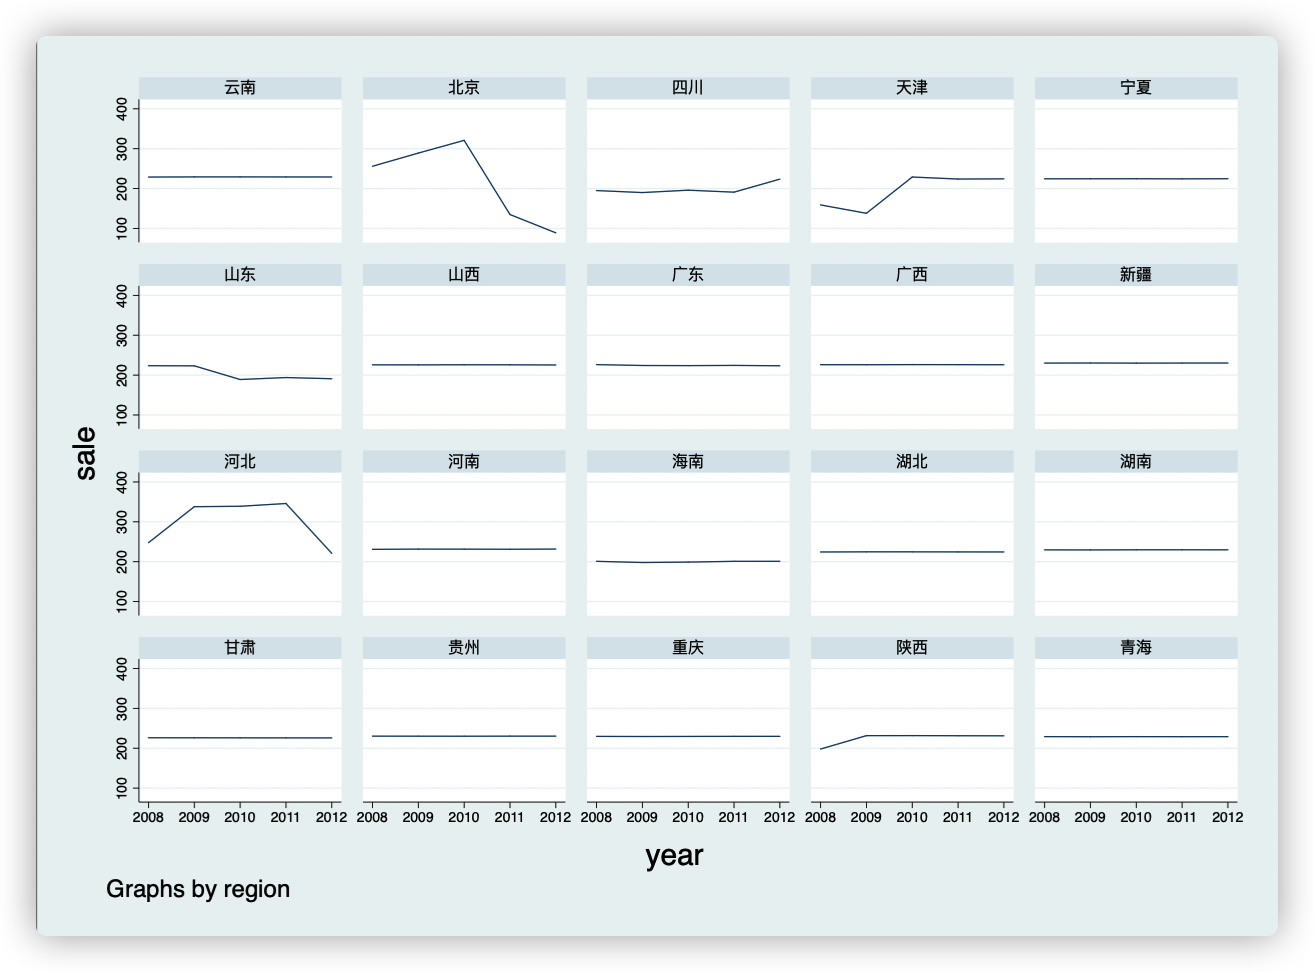

In [10]:
xtline cost

(note: scheme plotplain not found, using s2color)


In [11]:
reg profit sale cost


      Source |       SS           df       MS      Number of obs   =       100
-------------+----------------------------------   F(2, 97)        =     89.45
       Model |  33.5060219         2   16.753011   Prob > F        =    0.0000
    Residual |  18.1660474        97   .18727884   R-squared       =    0.6484
-------------+----------------------------------   Adj R-squared   =    0.6412
       Total |  51.6720694        99  .521940095   Root MSE        =    .43276

------------------------------------------------------------------------------
      profit |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.004      0.001     2.97   0.004        0.001       0.007
        cost |      0.856      0.075    11.40   0.000        0.707       1.005
       _cons |     -0.416      0.818    -0.51   0.613       -2.040       1.209
--------------------------------------------------

In [12]:
reg profit sale cost,vce(cluster region)


Linear regression                               Number of obs     =        100
                                                F(2, 19)          =      62.11
                                                Prob > F          =     0.0000
                                                R-squared         =     0.6484
                                                Root MSE          =     .43276

                                (Std. Err. adjusted for 20 clusters in region)
------------------------------------------------------------------------------
             |               Robust
      profit |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.004      0.003     1.48   0.155       -0.002       0.010
        cost |      0.856      0.218     3.92   0.001        0.399       1.312
       _cons |     -0.416      1.956    -0.21   0.834       -4.510       3.678
--------------

In [13]:
xtreg profit sale cost,vce(cluster region)


Random-effects GLS regression                   Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.1577                                         min =          5
     between = 0.6792                                         avg =        5.0
     overall = 0.6399                                         max =          5

                                                Wald chi2(2)      =     117.12
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

                                (Std. Err. adjusted for 20 clusters in region)
------------------------------------------------------------------------------
             |               Robust
      profit |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.001   

In [14]:
xtreg profit sale cost


Random-effects GLS regression                   Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.1577                                         min =          5
     between = 0.6792                                         avg =        5.0
     overall = 0.6399                                         max =          5

                                                Wald chi2(2)      =      38.69
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

------------------------------------------------------------------------------
      profit |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.001      0.001     1.83   0.067       -0.000       0.002
        cost |      0.509      0.085     5.99   0.000        0.3

In [15]:
estimates store fe 

In [16]:
xi:xtreg profit sale cost i.region,vce(cluster region)

i.region          _Iregion_1-20       (naturally coded; _Iregion_1 omitted)

Random-effects GLS regression                   Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.1578                                         min =          5
     between = 1.0000                                         avg =        5.0
     overall = 0.9657                                         max =          5

                                                Wald chi2(2)      =          .
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =          .

                                (Std. Err. adjusted for 20 clusters in region)
------------------------------------------------------------------------------
             |               Robust
      profit |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+-----------------

In [17]:
tab year,gen(year)


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       2008 |         20       20.00       20.00
       2009 |         20       20.00       40.00
       2010 |         20       20.00       60.00
       2011 |         20       20.00       80.00
       2012 |         20       20.00      100.00
------------+-----------------------------------
      Total |        100      100.00


In [18]:
xtreg profit sale cost year2-year5,fe vce(cluster region) //固定效应回归


Fixed-effects (within) regression               Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.1893                                         min =          5
     between = 0.6822                                         avg =        5.0
     overall = 0.6412                                         max =          5

                                                F(6,19)           =       5.33
corr(u_i, Xb)  = 0.6518                         Prob > F          =     0.0022

                                (Std. Err. adjusted for 20 clusters in region)
------------------------------------------------------------------------------
             |               Robust
      profit |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.001   

In [19]:
test year2 year3 year4 year5 //测试系数显著性


 ( 1)  year2 = 0
 ( 2)  year3 = 0
 ( 3)  year4 = 0
 ( 4)  year5 = 0

       F(  4,    19) =    0.65
            Prob > F =    0.6326


In [20]:
xtreg profit sale cost year2-year5,re vce(cluster region) //随机效应回归


Random-effects GLS regression                   Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.1849                                         min =          5
     between = 0.6807                                         avg =        5.0
     overall = 0.6435                                         max =          5

                                                Wald chi2(6)      =     124.50
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

                                (Std. Err. adjusted for 20 clusters in region)
------------------------------------------------------------------------------
             |               Robust
      profit |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.001   

In [21]:
xttest0


Breusch and Pagan Lagrangian multiplier test for random effects

        profit[region,t] = Xb + u[region] + e[region,t]

        Estimated results:
                         |       Var     sd = sqrt(Var)
                ---------+-----------------------------
                  profit |   .5219401       .7224542
                       e |   .0230578       .1518479
                       u |   .1593593       .3991983

        Test:   Var(u) = 0
                             chibar2(01) =   126.89
                          Prob > chibar2 =   0.0000


In [22]:
xtreg profit sale cost,mle //最大似然估计


Fitting constant-only model:
Iteration 0:   log likelihood = -6.3668496
Iteration 1:   log likelihood = -5.5980461
Iteration 2:   log likelihood = -5.4551521
Iteration 3:   log likelihood = -5.4538811

Fitting full model:
Iteration 0:   log likelihood = -9.2297847
Iteration 1:   log likelihood =  4.9352949
Iteration 2:   log likelihood =   7.451491
Iteration 3:   log likelihood =  7.5302185
Iteration 4:   log likelihood =  7.5306633

Random-effects ML regression                    Number of obs     =        100
Group variable: region                          Number of groups  =         20

Random effects u_i ~ Gaussian                   Obs per group:
                                                              min =          5
                                                              avg =        5.0
                                                              max =          5

                                                LR chi2(2)        =      25.97
Log likelihood  =  7.5

In [ ]:
xtreg profit sale cost,be //组间估计，损失信息，变差


Between regression (regression on group means)  Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.0729                                         min =          5
     between = 0.7188                                         avg =        5.0
     overall = 0.5973                                         max =          5

                                                F(2,17)           =      21.73
sd(u_i + avg(e_i.))=  .4049331                  Prob > F          =     0.0000

------------------------------------------------------------------------------
      profit |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.010      0.005     1.94   0.069       -0.001       0.022
        cost |      0.770      0.186     4.14   0.001        0.3

In [31]:
xtreg profit sale cost,re


Random-effects GLS regression                   Number of obs     =        100
Group variable: region                          Number of groups  =         20

R-sq:                                           Obs per group:
     within  = 0.1577                                         min =          5
     between = 0.6792                                         avg =        5.0
     overall = 0.6399                                         max =          5

                                                Wald chi2(2)      =      38.69
corr(u_i, X)   = 0 (assumed)                    Prob > chi2       =     0.0000

------------------------------------------------------------------------------
      profit |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        sale |      0.001      0.001     1.83   0.067       -0.000       0.002
        cost |      0.509      0.085     5.99   0.000        0.3

In [32]:
estimates store re 

In [34]:
hausman fe re,constant sigmamore // 豪斯曼检验，判断选哪个


Note: the rank of the differenced variance matrix (2) does not equal the number
        of coefficients being tested (3); be sure this is what you expect, or
        there may be problems computing the test.  Examine the output of your
        estimators for anything unexpected and possibly consider scaling your
        variables so that the coefficients are on a similar scale.

                 ---- Coefficients ----
             |      (b)          (B)            (b-B)     sqrt(diag(V_b-V_B))
             |       fe           re         Difference          S.E.
-------------+----------------------------------------------------------------
        sale |    .0011425     .0011425       -7.81e-18               .
        cost |    .5092882     .5092882       -6.99e-15               .
       _cons |    4.241935     4.241935        8.26e-14               .
------------------------------------------------------------------------------
                           b = consistent under Ho and 

## 长面板

长面板数据是面板数据的一种，其主要特征是时间维度比较大而橫截面维度相对较小，或者说，同一期间内被观测的期间较多而被观测的个体数量较少。长面板数据分析相对更加关注设定扰动项相关的具体形式，一般使用可行广义最小二乘法进行估计。这又分为两种情形，一种是仅解决组内自相关的可行广义最小二乘估计，另一种是同时处理组内自相关与组间同期相关的可行广义最小二乘估计。

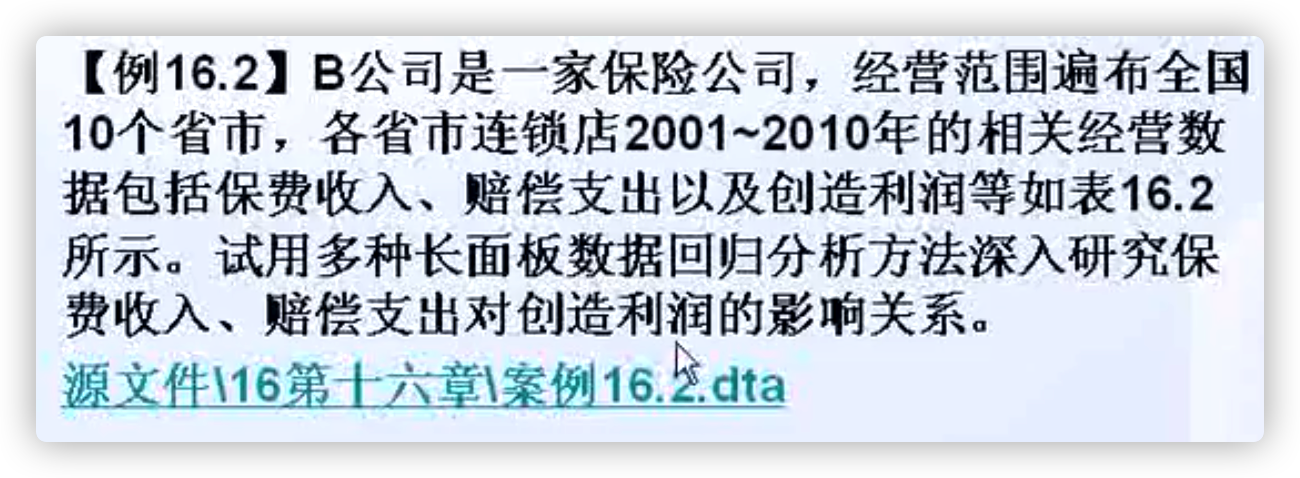

In [37]:
use "/Users/mac/Documents/Stata/计量与stata实例讲解数据/chap16/习题16.2.dta", clear

. use "/Users/mac/Documents/Stata/计量与stata实例讲解数据/chap16/习题16.2.dta", 
> clear


In [38]:
list 


     +--------------------------------------------+
     | year    income    cost   profit   shengshi |
     |--------------------------------------------|
  1. | 2001    25.308   11.02    1.656       浙江 |
  2. | 2002    25.281    8.81    1.495       浙江 |
  3. | 2003    24.779    7.93    1.211       浙江 |
  4. | 2004     24.02    6.48    1.195       浙江 |
  5. | 2005    23.154    6.04    1.026       浙江 |
     |--------------------------------------------|
  6. | 2006    30.892    6.89    3.835       浙江 |
  7. | 2007    30.594       6      3.5       浙江 |
  8. | 2008    30.348     5.5    3.695       浙江 |
  9. | 2009    30.054    4.94    3.406       浙江 |
 10. | 2010    29.797    4.79    3.275       浙江 |
     |--------------------------------------------|
 11. | 2001    46.229   11.53      3.9       广东 |
 12. | 2002    46.155   10.85    3.884       广东 |
 13. | 2003    45.945    9.73    3.975       广东 |
 14. | 2004    45.373    8.51    3.247       广东 |
 15. | 2005     45.02    8.15    3.738 

In [39]:
encode shengshi,gen(region)

In [40]:
xtset region year

       panel variable:  region (strongly balanced)
        time variable:  year, 2001 to 2010
                delta:  1 unit


In [41]:
xtdes 


  region:  1, 2, ..., 8                                      n =          8
    year:  2001, 2002, ..., 2010                             T =         10
           Delta(year) = 1 unit
           Span(year)  = 10 periods
           (region*year uniquely identifies each observation)

Distribution of T_i:   min      5%     25%       50%       75%     95%     max
                        10      10      10        10        10      10      10

     Freq.  Percent    Cum. |  Pattern
 ---------------------------+------------
        8    100.00  100.00 |  1111111111
 ---------------------------+------------
        8    100.00         |  XXXXXXXXXX


In [42]:
xtsum 


Variable         |      Mean   Std. Dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
year     overall |    2005.5   2.890403       2001       2010 |     N =      80
         between |                    0     2005.5     2005.5 |     n =       8
         within  |             2.890403       2001       2010 |     T =      10
                 |                                            |
income   overall |  60.31106   75.89957     22.774    261.083 |     N =      80
         between |             52.28008    24.7873   143.9062 |     n =       8
         within  |             57.78336  -55.46914   177.4879 |     T =      10
                 |                                            |
cost     overall |   12.8525   13.41096        4.7      58.56 |     N =      80
         between |              9.26838      6.324     27.465 |     n =       8
         within  |             10.18515    -7.8025    43.9475 |     T =

In [43]:
xttab cost //频率统计


                  Overall             Between            Within
     cost |    Freq.  Percent      Freq.  Percent        Percent
----------+-----------------------------------------------------
      4.7 |       2      2.50         2     25.00          10.00
     4.79 |       2      2.50         2     25.00          10.00
      4.8 |       2      2.50         2     25.00          10.00
     4.94 |       2      2.50         2     25.00          10.00
     5.09 |       2      2.50         2     25.00          10.00
     5.22 |       2      2.50         2     25.00          10.00
      5.5 |       2      2.50         2     25.00          10.00
      5.8 |       2      2.50         2     25.00          10.00
        6 |       2      2.50         2     25.00          10.00
     6.04 |       2      2.50         2     25.00          10.00
     6.48 |       2      2.50         2     25.00          10.00
     6.67 |       3      3.75         3     37.50          10.00
     6.81 |       2      